# PyROSM

In [1]:
import pyrosm
from pyrosm.data import sources
import geopandas
import pygadm
import os
import geopandas as gpd

#Provence Alpes-Cote-d'Azur

In [5]:
#get polygon of study region
country_code = 'DEU'
gadm_level = 2
region_name = 'Elbe-Elster'


custom_polygon_filename = 'gadm41_CHN_1_NeiMongol.geojson'

dirname = os.getcwd()

# Define output directories
output_dir = os.path.join(dirname, 'osm_data_test')
os.makedirs(output_dir, exist_ok=True)

#get region boundary
if custom_polygon_filename:
    custom_polygon_filepath = os.path.join(dirname, '..','Raw_Spatial_Data','custom_study_area', custom_polygon_filename)
    region = gpd.read_file(custom_polygon_filepath)
elif gadm_level==0:
    gadm_data = pygadm.Items(admin=country_code)
    region = gadm_data
    region.set_crs('epsg:4326', inplace=True) #pygadm lib extracts information from the GADM dataset as GeoPandas GeoDataFrame. GADM.org provides files in coordinate reference system is longitude/latitude and the WGS84 datum.
else:
    gadm_data = pygadm.Items(admin=country_code, content_level=gadm_level)
    region = gadm_data.loc[gadm_data[f'NAME_{gadm_level}']==region_name]
    region.set_crs('epsg:4326', inplace=True) #pygadm lib extracts information from the GADM dataset as GeoPandas GeoDataFrame. GADM.org provides files in coordinate reference system is longitude/latitude and the WGS84 datum.
    #region.to_file(os.path.join(output_dir, f'{region_name_clean}_4326.geojson'), driver='GeoJSON', encoding='utf-8')


<Axes: >

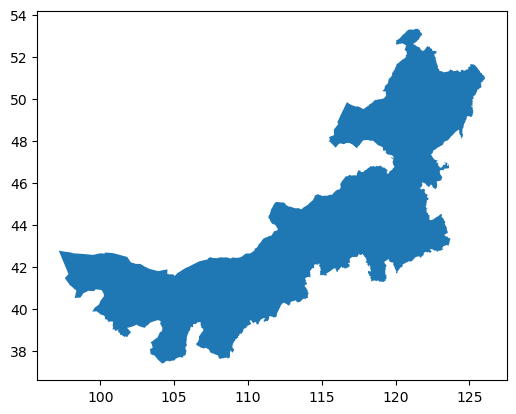

In [6]:
region.plot()

## inspect data files of available regions

In [4]:
# find the right name of the available regions for the OSM .pbf data dump on Geofabrik
# Print available source categories
print("All available source categories:", sources.available.keys())
# Check all countries having sub-regions
print("All countries with sub-regions:", sources.subregions.available.keys())
# Check sub-regions in certain country
print("Sub-regions in certain country:", sources.subregions.poland.available)

All available source categories: dict_keys(['africa', 'antarctica', 'asia', 'australia_oceania', 'central_america', 'europe', 'north_america', 'south_america', 'cities', 'subregions'])
All countries with sub-regions: dict_keys(['brazil', 'canada', 'france', 'germany', 'great_britain', 'italy', 'japan', 'netherlands', 'poland', 'russia', 'usa'])
Sub-regions in certain country: ['dolnoslaskie', 'kujawsko_pomorskie', 'lodzkie', 'lubelskie', 'lubuskie', 'malopolskie', 'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 'pomorskie', 'slaskie', 'swietokrzyskie', 'warminsko_mazurskie', 'wielkopolskie', 'zachodniopomorskie']


In [20]:
# download the data and get the filePath where it is saved
#fp = pyrosm.get_data("brandenburg", directory='osm_data_test')
#print(fp)

fp = os.path.join(dirname, 'osm_data_test', 'china-latest.osm.pbf')

# pyrosm always downloads the whole .pbf data dump from Geofabrik; 
# spatial filtering/clipping is possible on the local file (see: https://github.com/pyrosm/pyrosm/issues/165)

In [21]:
# Initialize the OSM object 
# osm = pyrosm.OSM(fp)

# Initialize the OSM object with bounding box (bbox needs to shapely geometry)
bbox_geom = region['geometry'].values[0] 
osm = pyrosm.OSM(fp, bounding_box=bbox_geom)

In [22]:
EPSG=4326      # elbe elster: 32633

In [ ]:
# read roads with pre-defined network types
# drive_net = osm.get_network(network_type="driving", custom_filter=my_filter)

# custom filters download

In [ ]:
# power from pyrosm not usefull!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# custom filter (key: [list of values])
# power_filter = {"power": ['line', 'substation']}

# power = osm.get_data_by_custom_criteria(custom_filter=power_filter, filter_type='keep', keep_nodes=False)
# power.to_crs(epsg=EPSG, inplace=True)
# power.to_file(os.path.join(output_dir,f"OSM_power.gpkg"), driver="GPKG")

In [ ]:
# custom filter
my_filter = {"railway": ["funicular", "monorail", 'narrow_gauge', 'rail']}

railways = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
railways.to_crs(epsg=EPSG, inplace=True)
railways.to_file(os.path.join(output_dir,f"OSM_railways.gpkg"), driver="GPKG")

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000020585BD51C0>>
Traceback (most recent call last):
  File "c:\Users\b396636\AppData\Local\anaconda3\envs\lava\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\b396636\AppData\Local\anaconda3\envs\lava\Lib\threading.py", line 1535, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


In [ ]:
# custom filter
my_filter = {"highway": ["motorway", "trunk", 'primary', 'secondary', 'tertiary',
                         'unclassified']}

roads = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
roads.to_crs(epsg=EPSG, inplace=True)
roads.to_file(os.path.join(output_dir,f"OSM_roads.gpkg"), driver="GPKG")

In [ ]:
# custom filter
my_filter = {"aeroway": ['apron', "aerodrome"]} #"aeroway", "apron", 'runway', 'spaceport', 'taxiway'

airports = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
airports.to_crs(epsg=EPSG, inplace=True)
airports.to_file(os.path.join(output_dir,f"OSM_airports.gpkg"), driver="GPKG")

In [ ]:
# custom filter (key: [list of values])
my_filter = {"waterway": ["river", "tidal_channel", 'canal']} #'stream'

waterways = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
waterways.to_crs(epsg=EPSG, inplace=True)
waterways.to_file(os.path.join(output_dir,f"OSM_waterways.gpkg"), driver="GPKG")

In [ ]:
# custom filter (key: [list of values])
my_filter = {"landuse": ["military"]}

military = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
military.to_crs(epsg=EPSG, inplace=True)
military.to_file(os.path.join(output_dir,f"OSM_military.gpkg"), driver="GPKG")

## test power

In [6]:
# custom filter
my_filter = {"power": ['line']}

roads = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
roads.to_crs(epsg=EPSG, inplace=True)
roads.to_file(os.path.join(output_dir,f"OSM_lines.gpkg"), driver="GPKG")

In [7]:
# custom filter
my_filter = {"power": ['generator']}

roads = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
roads.to_crs(epsg=EPSG, inplace=True)
roads.to_file(os.path.join(output_dir,f"OSM_generators.gpkg"), driver="GPKG")

https://github.com/pyrosm/pyrosm/issues/67#issuecomment-720482051

https://udsleeds.github.io/openinfra/articles/osm-python.html

# Test filtering strategy

## 1st filter for all relevant OSM items, then filter seperately

In [19]:
# custom filter (key: [list of values])
my_filter = {"railway": ["funicular", "monorail", 'narrow_gauge', 'rail'],
             "highway": ["motorway", "trunk", 'primary', 'secondary', 'tertiary','unclassified'],
             "aeroway": ['apron', "aerodrome"],
             "waterway": ["river", "tidal_channel", 'canal'],
             "landuse": ["military"]} 

all_OSM_data = osm.get_data_by_custom_criteria(custom_filter=my_filter, filter_type='keep', keep_nodes=False)
all_OSM_data.to_crs(epsg=EPSG, inplace=True)
all_OSM_data.to_file(os.path.join(output_dir,f"all_OSM_data.gpkg"), driver="GPKG")